In [101]:
file ='/home/andre/Documentos/TENSAO_NEW/P_L_/P_L_PB_1_1/P_L_PB_1_1.txt'

In [102]:
r = open(file,'r')
print(r)

<_io.TextIOWrapper name='/home/andre/Documentos/TENSAO_NEW/P_L_/P_L_PB_1_1/P_L_PB_1_1.txt' mode='r' encoding='UTF-8'>


In [137]:
import numpy as np
psi=0
r = open(file,'r')
printar = False
vx = []
vy = []
for i in r:
    if printar:
        value = i.split(' ')
        x=value[3]
        x = float(x)
        vx.append(x)
        y=value[-1].split('\n')[0]
        y =float(y)
        vy.append(y)
    if not printar and '<2Theta>   <   I   >' in i:
        printar = True
    if not printar and 'psi angle' in i:
        value = i.split(' ')
        psi=float(value[-3])

        
vx = np.asarray(vx)
vy = np.asarray(vy)
psi

12.92

In [138]:
vy[0]

4478.0

In [139]:
import matplotlib.pyplot as plt

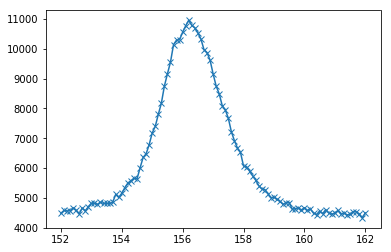

In [140]:
plt.plot(vx,vy,'-x')
plt.show()

In [141]:
from lmfit.models import VoigtModel,PseudoVoigtModel, LinearModel,GaussianModel
mod = VoigtModel()
y=vy
pars = mod.guess(y, x=vx)
out  = mod.fit(y, pars, x=x)
out.best_values

{'sigma': 3.8819332846359895,
 'center': 167.1881076920733,
 'amplitude': 170747.4419210397,
 'gamma': 3.8819332846359895}

In [142]:
mod = PseudoVoigtModel()
y=vy
pars = mod.guess(y, x=vx)
out  = mod.fit(y, pars, x=x)
out.best_values

{'fraction': 0.6796538983760201,
 'sigma': 81.19750692828977,
 'center': 167.87243843324723,
 'amplitude': 1367060.4363911098}

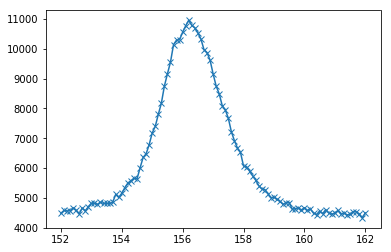

In [143]:
plt.plot(vx,vy,'-x')
plt.show()

In [134]:
r = open(file,'r')
psi=0
for i in r:
    if 'psi angle' in i:
        value = i.split(' ')
        psi=float(value[-3])

In [133]:
value[-3]

'12.92'

In [144]:
dados='P_L_PB_1'
files=range(1,11)
for i in files:
    file_name='P_L_/{}_{}/{}_{}.txt'.format(dados,str(i),dados,str(i))
    print(file_name)

P_L_/P_L_PB_1_1/P_L_PB_1_1.txt
P_L_/P_L_PB_1_2/P_L_PB_1_2.txt
P_L_/P_L_PB_1_3/P_L_PB_1_3.txt
P_L_/P_L_PB_1_4/P_L_PB_1_4.txt
P_L_/P_L_PB_1_5/P_L_PB_1_5.txt
P_L_/P_L_PB_1_6/P_L_PB_1_6.txt
P_L_/P_L_PB_1_7/P_L_PB_1_7.txt
P_L_/P_L_PB_1_8/P_L_PB_1_8.txt
P_L_/P_L_PB_1_9/P_L_PB_1_9.txt
P_L_/P_L_PB_1_10/P_L_PB_1_10.txt


In [145]:
x = range(1,11)
x

range(1, 11)

In [147]:
type(x)

range

In [148]:
x=[0.0, 0.04999264830149265, 0.09994818201607657, 0.1500436520520622, 0.1999294769267522, 0.24999999999999994, 0.29998543138136763, 0.3499800468793619, 0.3999739988612192, 0.4499927973394826, 0.4999999999999999]
y=[156.45285860772861, 156.40154645113063, 156.36223035884663, 156.33801688528962, 156.33870568352705, 156.33995258564048, 156.36106219768794, 156.38669955571729, 156.4154022074149, 156.45193243624274, 156.47870813434142]


In [149]:
mod = LinearModel()
pars = mod.guess(y, x=x)
out  = mod.fit(y, pars, x=x)

In [151]:
out.best_fit

array([156.36564458, 156.37118998, 156.37673126, 156.38228806,
       156.38782161, 156.39337565, 156.39892025, 156.40446587,
       156.41001141, 156.41555971, 156.42110672])

OK
OK
OK
OK
OK


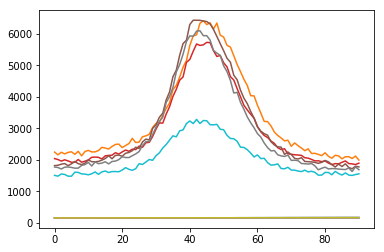

In [229]:
def get_value(i):
    return float(i.split(' ')[-1].split('\n')[0])

def conver_list(i):
    value = i.split(',')
    for i in value:
        if len(x)==0:
            x.append(dicio['*START'])
            y.append(float(i))
            dicio['*NEW_DICIO']=(dicio['*START']+dicio['*STEP'])
        else:
            x.append(dicio['*NEW_DICIO'])
            dicio['*NEW_DICIO']=(dicio['*NEW_DICIO']+dicio['*STEP'])
            y.append(float(i))
            
dicio={
    '*START':0.0,
    '*STOP' :0.0,
    '*STEP' :0.0,
    '*ST_PSI_ANGLE':0.0
}

list_keys = list(dicio.keys())

file ='/home/andre/Documentos/TENSAO_NEW/P_L_1/P_PB_L_1.ASC'
r = open(file,'r')
find_intensity=False
x=[]
y=[]
for i in r:
    #print(i)
    if '*END' in i:
        print('OK')
        find_intensity=False
        vx = np.asarray(x)
        vy = np.asarray(y)
        plt.plot(vx)
        plt.plot(vy)
        x=[]
        y=[]
    elif find_intensity:
        conver_list(i)
    elif '*START' in i:
        dicio['*START']=get_value(i)
    elif '*STOP' in i:
        dicio['*STOP']=get_value(i)
    elif '*STEP' in i:
        dicio['*STEP']=get_value(i)
    elif '*ST_PSI_ANGLE' in i:
        dicio['*ST_PSI_ANGLE']=get_value(i)        
    elif '*COUNT' in i and not '*COUNTER' in i:
        find_intensity=True        


vx = np.asarray(x)
vy = np.asarray(y)

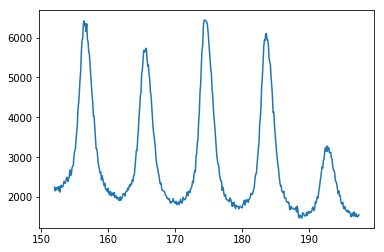

In [227]:
plt.plot(vx,vy)

In [184]:
file ='/home/andre/Documentos/TENSAO_NEW/P_L_1/P_PB_L_1.ASC'
r = open(file,'r')
for i in r:
    #print(i)
    if  i in ['*START']:
        print(i)
        break

In [173]:
list(dicio.keys())


['*START', '*STOP', '*STEP', '*ST_PSI_ANGLE']

In [161]:
float(i.split(' ')[-1].split('\n')[0])

152.0